# VOLUNTARIO LENARD-JONES 
## Teresa Puyol López

## Apartado 1:
Animamos un grid de N partículas, representaremos su energía y haremos un histograma de su velocidad.

Animamos las partículas. Lee las posiciones de un fichero y ACTUALMENTE, el número de partículas se lo doy por pantalla

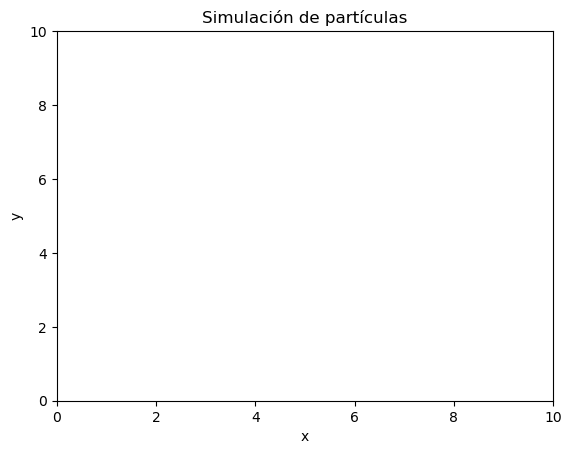

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/posiciones.txt"   # nombre de tu fichero
N           = 20                 # número de partículas por “frame”
interval_ms = 10                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/simulacion.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title('Simulación de partículas')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,

# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,

# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=True)

# Mostrar por pantalla
plt.show()

#+ Guardar como vídeo mp4 
anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')


Ahora representamos la energía cinética, potencial y la total. Los datos los lee de un fichero

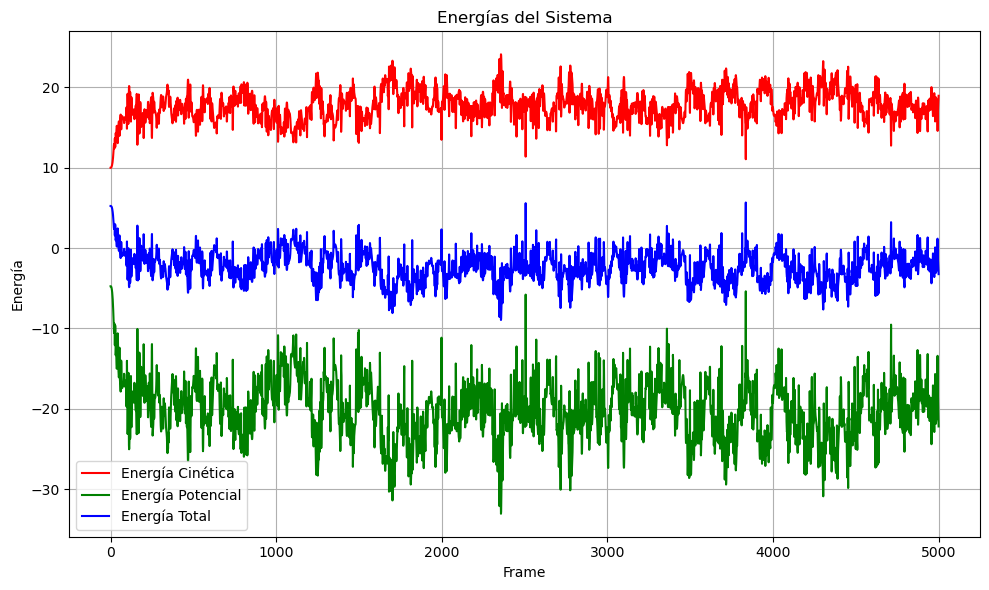

In [5]:
# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/energia.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

plt.title('Energías del Sistema')
plt.xlabel('Frame')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()


Ahora hacemos el histograma